In [1]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv("m.csv")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split




In [4]:
df.iloc[1521:1522,]

,m,Mラジ ～まとまり系競馬サロン～,http://keiba-know.up.seesaa.net/image/podcast_artwork.jpg,http://keiba-know.seesaa.net/index20.rdf,http://keiba-know.seesaa.net/,ブライト、MIO、TAKUYA,Unnamed: 6,Unnamed: 7,Unnamed: 8,false,集いし三人のＭの戦士……。ブライト(C)、MIO(S)、TAKUYA(L)。その個性と知性とほんの少しだけ欲望がほとばしる！…そんなネットラジオ番組をお送りします（Mの法則による競馬予想）。,Mの法則を駆使した競馬予想＆回顧を配信！
1521,marly-smith-podcast-august-2013,Marly Smith - Podcast - August 2013,http://assets.podomatic.net/ts/34/08/16/marly-...,http://djmarlysmith.podomatic.com/rss2.xml,http://djmarlysmith.podomatic.com,NaN,NaN,NaN,NaN,NaN,NaN,Give my new monthly podcast a listen! gonna ke...


In [5]:
pod_descriptions = df.iloc[:,11]

In [6]:
pod_descriptions.iloc[1521]

'Give my new monthly podcast a listen! gonna keep it varied genres, expect a bit of everything'

In [7]:
pod_descriptions.shape

(7772,)

In [8]:
pod_descriptions= pod_descriptions.dropna()

In [9]:
count_vectorizer = CountVectorizer(stop_words='english')

In [10]:
count_train = count_vectorizer.fit_transform(pod_descriptions)

In [11]:
tweets = pd.read_csv("J_tsar_tweets.csv")

In [12]:
trans_tweets = count_vectorizer.transform(tweets.iloc[:1,2])

In [13]:
trans_tweets.shape

(1, 22472)

In [13]:
trans_tweets[:]

<1x22472 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [14]:
# Create an NMF instance: model
model = NMF(n_components=200)

# Fit the model to articles
model.fit(count_train)

# Transform the articles: nmf_features
nmf_features =model.transform(count_train)

# Print the NMF features
print(nmf_features.shape)

(6747, 200)


In [15]:
tweets_nmf_features =model.transform(trans_tweets)

In [16]:
normalizer = Normalizer() 

In [17]:
norm_nmf_features = normalizer.fit_transform(nmf_features)

In [18]:
normalizer = Normalizer() 

In [19]:
norm_tweet_nmf_features = normalizer.fit_transform(tweets_nmf_features)

In [20]:
new_pd =pd.DataFrame(norm_nmf_features)

In [22]:
new_pd.shape

(6747, 50)

In [23]:
tweet_pd = pd.DataFrame(norm_tweet_nmf_features)

In [24]:
final_pd = new_pd.append(tweet_pd)

In [25]:
final_pd.shape

(6748, 50)

In [26]:
tweet_1 =final_pd.iloc[6747:6748,]

In [27]:
#t_1 = np.reshape(tweet_1,(1,6))

In [28]:
A_matrix = final_pd.values

In [29]:
tweet_1_array = tweet_1.values

In [30]:
A = A_matrix[:6748-1]

In [31]:
similarities = np.dot(A,tweet_1.T)

In [32]:
np.amax(similarities)

0.7740608211884933

In [33]:
np.argmax(similarities)

1521

In [36]:
pod_names=[]
for idx,i in enumerate(similarities):
    pod_names.append(str(idx))

Text(0,0.5,'Similarities')

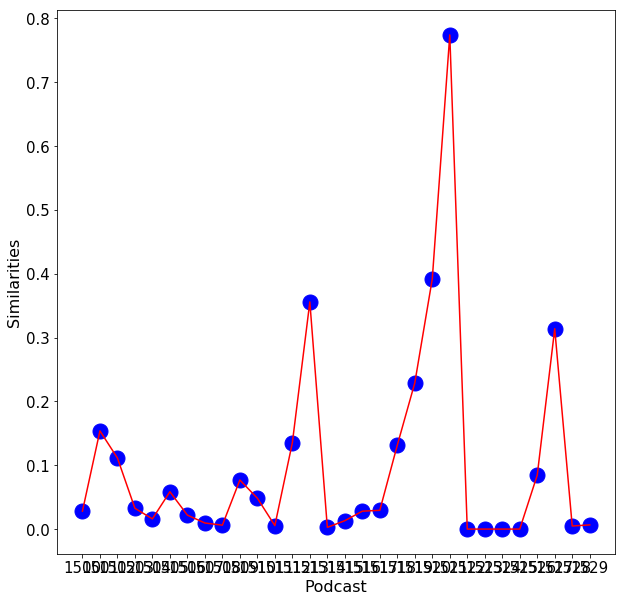

In [38]:

ax = plt.figure(figsize=(10,10))
plt.plot(pod_names[1500:1530],similarities[1500:1530],"bo",markersize=15)
plt.plot(pod_names[1500:1530],similarities[1500:1530],"r-")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel("Podcast",fontsize=16)
plt.ylabel('Similarities',fontsize=16)

In [ ]:
plt.plot()